In [2]:
import pandas as pd
import numpy as np


In [4]:
data = pd.read_excel("/content/bestsellers_with_categories_2022_03_27.xls")

In [5]:
data.head()

,Name,Author,User Rating,Reviews,Price,Year,Genre
0,"Act Like a Lady, Think Like a Man: What Men Re...",Steve Harvey,4.6,5013,17,2009,Non Fiction
1,Arguing with Idiots: How to Stop Small Minds a...,Glenn Beck,4.6,798,5,2009,Non Fiction
2,"Breaking Dawn (The Twilight Saga, Book 4)",Stephenie Meyer,4.6,9769,13,2009,Fiction
3,Crazy Love: Overwhelmed by a Relentless God,Francis Chan,4.7,1542,14,2009,Non Fiction
4,Dead And Gone: A Sookie Stackhouse Novel (Sook...,Charlaine Harris,4.6,1541,4,2009,Fiction


In [7]:
data.columns


Index(['Name', 'Author', 'User Rating', 'Reviews', 'Price', 'Year', 'Genre'], dtype='object')

In [8]:
data.shape

(700, 7)

In [9]:
data.describe()

,User Rating,Reviews,Price,Year
count,700.000000,700.000000,700.000000,700.000000
mean,4.639857,19255.195714,12.700000,2015.500000
std,0.218586,23613.443875,9.915162,4.034011
min,3.300000,37.000000,0.000000,2009.000000
25%,4.500000,4987.250000,7.000000,2012.000000
50%,4.700000,10284.000000,11.000000,2015.500000
75%,4.800000,23358.000000,15.000000,2019.000000
max,4.900000,208917.000000,105.000000,2022.000000


In [10]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 700 entries, 0 to 699
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Name         700 non-null    object 
 1   Author       700 non-null    object 
 2   User Rating  700 non-null    float64
 3   Reviews      700 non-null    int64  
 4   Price        700 non-null    int64  
 5   Year         700 non-null    int64  
 6   Genre        700 non-null    object 
dtypes: float64(1), int64(3), object(3)
memory usage: 38.4+ KB


In [11]:
data.isnull().any()

Name           False
Author         False
User Rating    False
Reviews        False
Price          False
Year           False
Genre          False
dtype: bool

In [12]:
data.isnull().sum()

Name           0
Author         0
User Rating    0
Reviews        0
Price          0
Year           0
Genre          0
dtype: int64

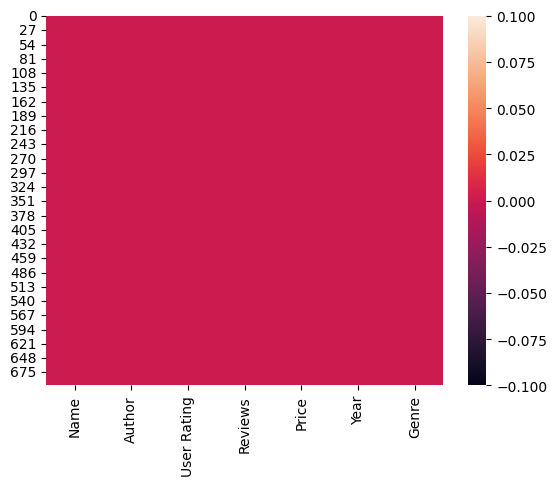

In [14]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.heatmap(data.isnull())
plt.show()

In [15]:
data.median()

<ipython-input-15-135339ac59ce>:1: FutureWarning: The default value of numeric_only in DataFrame.median is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  data.median()


User Rating        4.7
Reviews        10284.0
Price             11.0
Year            2015.5
dtype: float64

<Axes: >

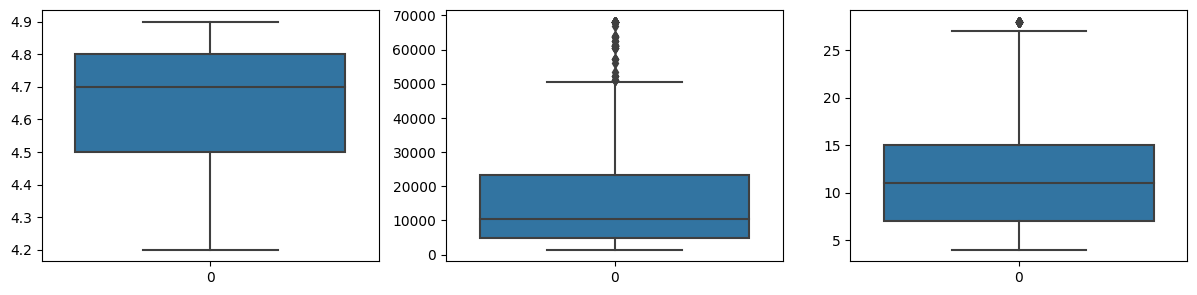

In [22]:
plt.figure(figsize = (20,15))
plt.subplot(4,4,1)
sns.boxplot(data['User Rating'])

plt.subplot(4,4,2)
sns.boxplot(data['Reviews'])

plt.subplot(4,4,3)
sns.boxplot(data['Price'])

In [17]:
data['Price'] = data['Price'].clip(lower=data['Price'].quantile(0.05), upper=data['Price'].quantile(0.95))

In [19]:
data['User Rating'] = data['User Rating'].clip(lower=data['User Rating'].quantile(0.05), upper=data['User Rating'].quantile(0.95))

In [20]:
data['Reviews'] = data['Reviews'].clip(lower=data['Reviews'].quantile(0.05), upper=data['Reviews'].quantile(0.95))

<Axes: >

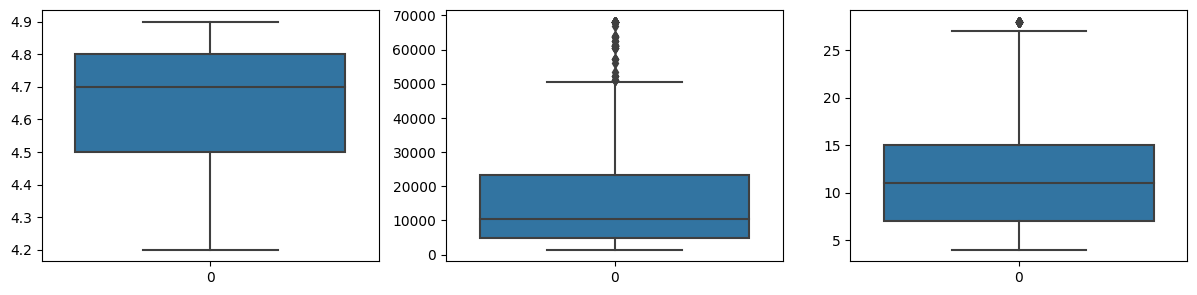

In [23]:
plt.figure(figsize = (20,15))
plt.subplot(4,4,1)
sns.boxplot(data['User Rating'])

plt.subplot(4,4,2)
sns.boxplot(data['Reviews'])

plt.subplot(4,4,3)
sns.boxplot(data['Price'])

<Axes: xlabel='Year', ylabel='count'>

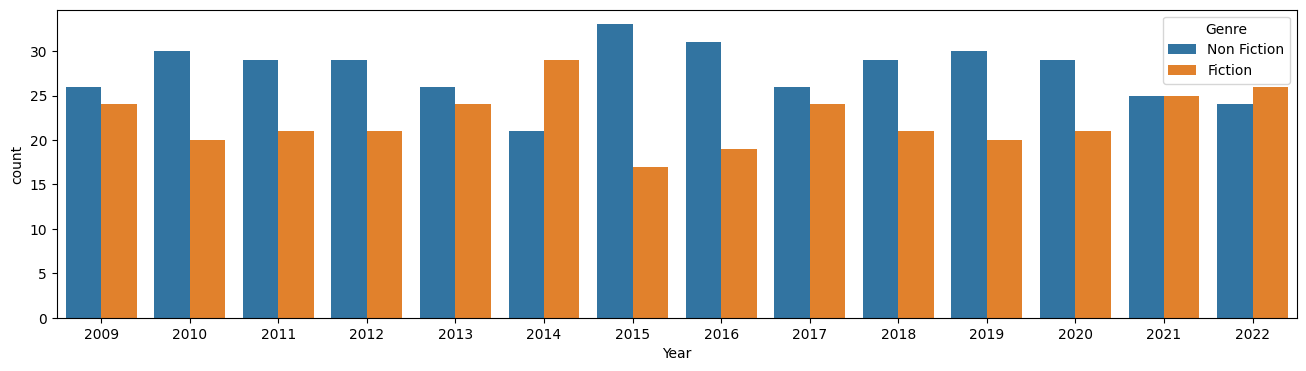

In [26]:
plt.figure(figsize=(16,4))

sns.countplot(x='Year', data = data, hue = 'Genre')